In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_finance = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw11\\Data\\financial_raw_data.csv')
df_finance.head()

,Date,Close_BND,Close_SPY,Close_TSLA,High_BND,High_SPY,High_TSLA,Low_BND,Low_SPY,Low_TSLA,Open_BND,Open_SPY,Open_TSLA,Volume_BND,Volume_SPY,Volume_TSLA
0,2015-01-02,62.573158,172.592896,14.620667,62.603442,173.811130,14.883333,62.399026,171.542703,14.217333,62.406598,173.391052,14.858000,2218800,121465900,71466000
1,2015-01-05,62.754799,169.475891,14.006000,62.777511,171.702294,14.433333,62.610951,169.165038,13.810667,62.641235,171.534266,14.303333,5820100,169632600,80527500
2,2015-01-06,62.936523,167.879623,14.085333,63.125795,170.316066,14.280000,62.860816,167.073070,13.614000,62.860816,169.786764,14.004000,3887600,209151400,93928500
3,2015-01-07,62.974377,169.971603,14.063333,63.050084,170.316070,14.318667,62.875958,168.770189,13.985333,62.944093,169.223867,14.223333,2433400,125346700,44526000
4,2015-01-08,62.875946,172.987793,14.041333,62.921369,173.206241,14.253333,62.815378,171.383108,14.000667,62.921369,171.399902,14.187333,1873400,147217800,51637500


In [5]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2535 non-null   object 
 1   Close_BND    2535 non-null   float64
 2   Close_SPY    2535 non-null   float64
 3   Close_TSLA   2535 non-null   float64
 4   High_BND     2535 non-null   float64
 5   High_SPY     2535 non-null   float64
 6   High_TSLA    2535 non-null   float64
 7   Low_BND      2535 non-null   float64
 8   Low_SPY      2535 non-null   float64
 9   Low_TSLA     2535 non-null   float64
 10  Open_BND     2535 non-null   float64
 11  Open_SPY     2535 non-null   float64
 12  Open_TSLA    2535 non-null   float64
 13  Volume_BND   2535 non-null   int64  
 14  Volume_SPY   2535 non-null   int64  
 15  Volume_TSLA  2535 non-null   int64  
dtypes: float64(12), int64(3), object(1)
memory usage: 317.0+ KB


In [6]:
df_finance.describe().T

,count,mean,std,min,25%,50%,75%,max
Close_BND,2535.0,6.928945e+01,4.792146e+00,6.186087e+01,6.556527e+01,6.832913e+01,7.287993e+01,7.882327e+01
Close_SPY,2535.0,3.160674e+02,1.179269e+02,1.568008e+02,2.148420e+02,2.771179e+02,4.058692e+02,6.097500e+02
Close_TSLA,2535.0,1.178482e+02,1.165083e+02,9.578000e+00,1.722800e+01,3.029800e+01,2.215250e+02,4.798600e+02
High_BND,2535.0,6.939126e+01,4.800409e+00,6.193737e+01,6.563018e+01,6.845787e+01,7.294644e+01,7.892020e+01
High_SPY,2535.0,3.177257e+02,1.184864e+02,1.578641e+02,2.157022e+02,2.779195e+02,4.091343e+02,6.107800e+02
High_TSLA,2535.0,1.204748e+02,1.192360e+02,1.033133e+01,1.752767e+01,3.232933e+01,2.266967e+02,4.885400e+02
Low_BND,2535.0,6.918601e+01,4.782142e+00,6.182263e+01,6.547548e+01,6.816975e+01,7.272879e+01,7.878803e+01
Low_SPY,2535.0,3.141579e+02,1.172699e+02,1.546769e+02,2.142069e+02,2.760737e+02,4.028309e+02,6.068000e+02
Low_TSLA,2535.0,1.150975e+02,1.136989e+02,9.403333e+00,1.694200e+01,2.976000e+01,2.170617e+02,4.575100e+02
Open_BND,2535.0,6.929322e+01,4.793200e+00,6.189146e+01,6.555271e+01,6.831023e+01,7.284570e+01,7.888497e+01


In [8]:
df_finance['Date']= pd.to_datetime(df_finance['Date'])
df_finance.set_index('Date', inplace=True)

In [9]:
# Calculate daily percentage change (returns)
returns = df_finance.pct_change()

# Calculate rolling mean and rolling standard deviation (volatility)
rolling_mean = df_finance.rolling(window=30).mean()  # 30-day moving average
rolling_std = df_finance.rolling(window=30).std()  # 30-day rolling standard deviation

In [10]:
# Identify anomalies (outliers) based on Z-score
z_scores = (returns - returns.mean()) / returns.std()
outliers = returns[(z_scores.abs() > 3)]  # Consider Z-score > 3 as outlier

# Find days with unusually high/low returns
high_returns = returns[returns > returns.quantile(0.99)]  # Top 1% returns
low_returns = returns[returns < returns.quantile(0.01)]  # Bottom 1% returns

c:\Users\Aman\Desktop\kifyaw11\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


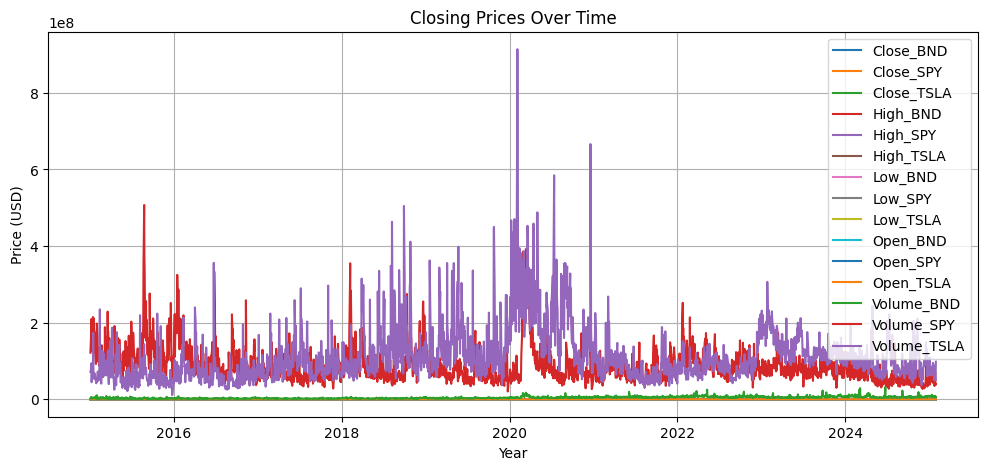

In [11]:
# 1️⃣ Plot Closing Prices Over Time
tickers = df_finance.columns
plt.figure(figsize=(12, 5))
for ticker in tickers:
    plt.plot(df_finance.index, df_finance[ticker], label=ticker)
plt.title("Closing Prices Over Time")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

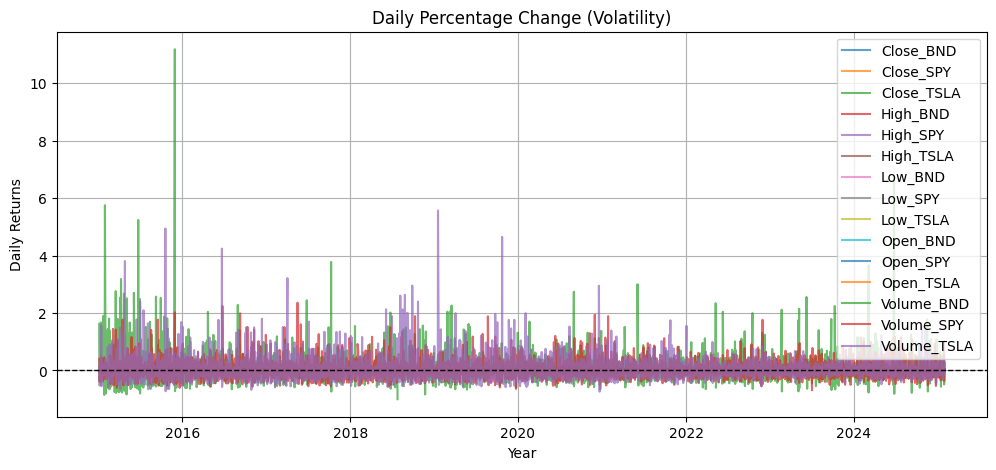

In [12]:
# 2️⃣ Plot Daily Percentage Change (Volatility)
plt.figure(figsize=(12, 5))
for ticker in tickers:
    plt.plot(returns.index, returns[ticker], label=ticker, alpha=0.7)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.title("Daily Percentage Change (Volatility)")
plt.xlabel("Year")
plt.ylabel("Daily Returns")
plt.legend()
plt.grid()
plt.show()

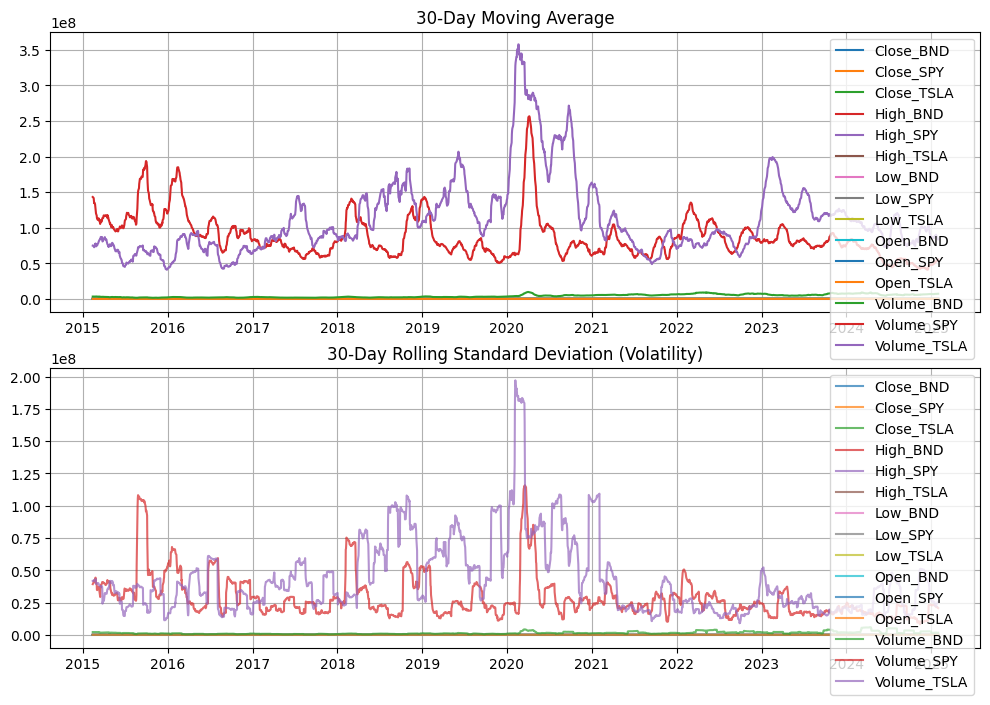

In [13]:
# 3️⃣ Plot Rolling Mean and Rolling Standard Deviation
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
for ticker in tickers:
    ax[0].plot(df_finance.index, rolling_mean[ticker], label=ticker)
ax[0].set_title("30-Day Moving Average")
ax[0].legend()
ax[0].grid()

for ticker in tickers:
    ax[1].plot(df_finance.index, rolling_std[ticker], label=ticker, alpha=0.7)
ax[1].set_title("30-Day Rolling Standard Deviation (Volatility)")
ax[1].legend()
ax[1].grid()

plt.show()

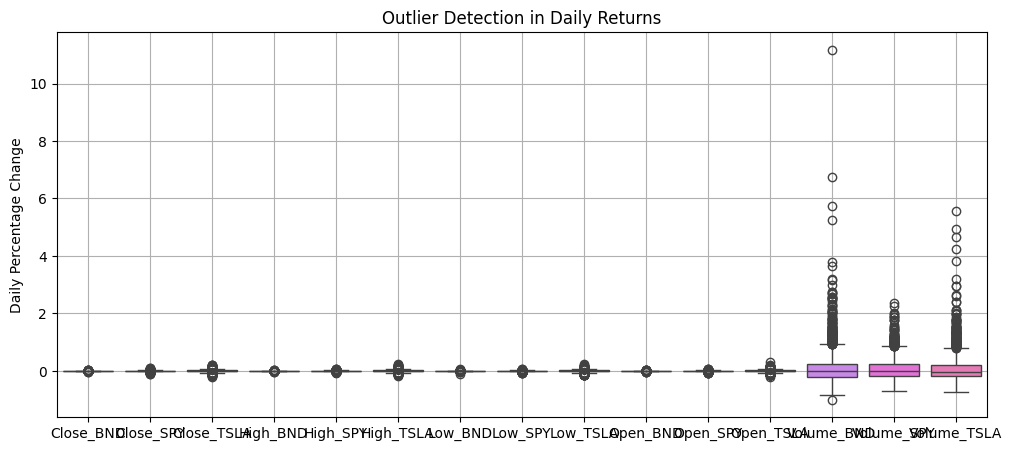

In [15]:
# 4️⃣ Outlier Detection - Highlight Extreme Daily Returns
plt.figure(figsize=(12, 5))
sns.boxplot(data=returns, showfliers=True)
plt.title("Outlier Detection in Daily Returns")
plt.ylabel("Daily Percentage Change")
plt.grid()
plt.show()